# Lotka-Volterra Trajectory Visualization

Explore the generated ODE trajectory data interactively.

In [1]:
from pathlib import Path
from data_processing.generate_data import (
    read_trajectories_parquet_as_dicts, 
    plot_sample,
    plot_param_vs_endpoint
)
import numpy as np
import matplotlib.pyplot as plt

# Set up matplotlib for interactive display
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

## 1. Load and Inspect Data

In [2]:
data_dir = Path("data_processing/data/lotka_volterra_trajectories")

# Load first sample to inspect
for i, sample in enumerate(read_trajectories_parquet_as_dicts(data_dir)):
    if i == 0:
        print(f"System: {sample['system']}")
        print(f"Run ID: {sample['run_id']}")
        print(f"Time points: {len(sample['t'])} (from {sample['t'][0]:.3f} to {sample['t'][-1]:.3f} seconds)")
        print(f"State shape: {sample['y'].shape} (time steps, state dimensions)")
        print(f"\nParameters:")
        for name, val in sample['params'].items():
            print(f"  {name}: {val:.4f}")
        print(f"\nFirst 5 time points:")
        print(f"  Time: {sample['t'][:5]}")
        print(f"  Prey (x): {sample['y'][:5, 0]}")
        print(f"  Predator (y): {sample['y'][:5, 1]}")
        break

System: lotka_volterra
Run ID: 3baaf44a-793d-4010-ac67-3271b75f640f
Time points: 5000 (from 0.000 to 49.990 seconds)
State shape: (5000, 2) (time steps, state dimensions)

Parameters:
  alpha: 1.0000
  beta: 0.5807
  gamma: 1.0000
  delta: 0.5000

First 5 time points:
  Time: [1.e-12 1.e-02 2.e-02 3.e-02 4.e-02]
  Prey (x): [0.76385885 0.76389932 0.76398662 0.76412046 0.76430058]
  Predator (y): [1.71814176 1.70755532 1.69703465 1.68657974 1.67619055]


## 2. Plot Individual Trajectories


--- Trajectory 0 ---
beta=0.581


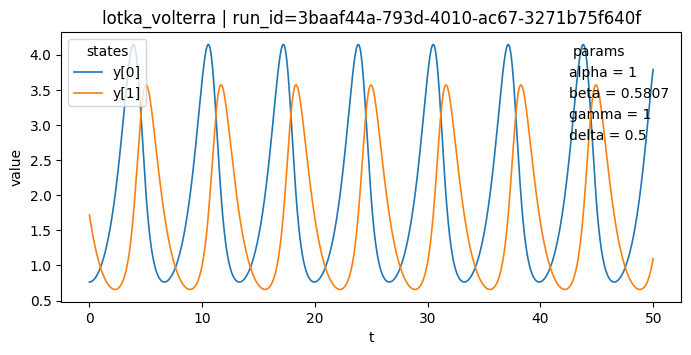


--- Trajectory 1 ---
beta=0.915


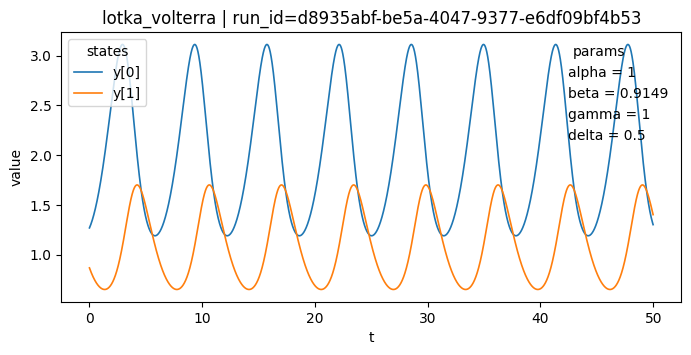


--- Trajectory 2 ---
beta=0.821


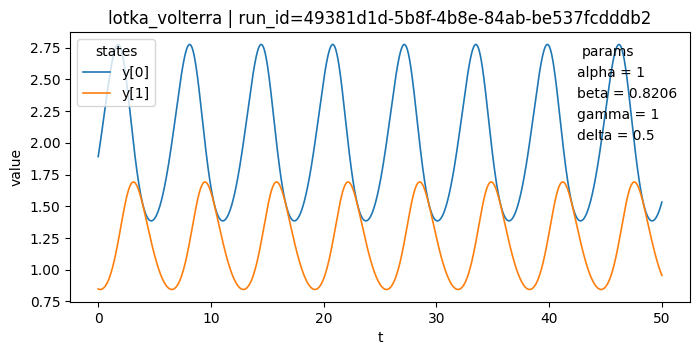


--- Trajectory 3 ---
beta=1.277


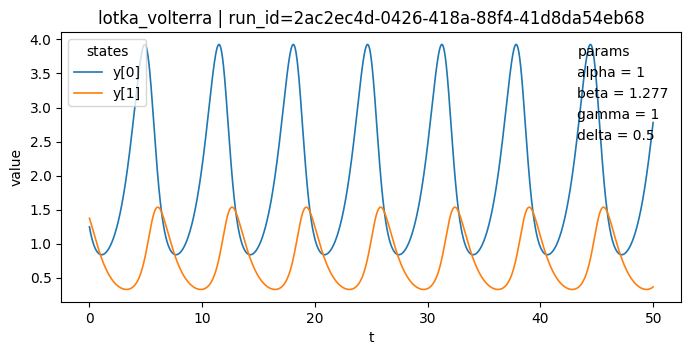


--- Trajectory 4 ---
beta=0.522


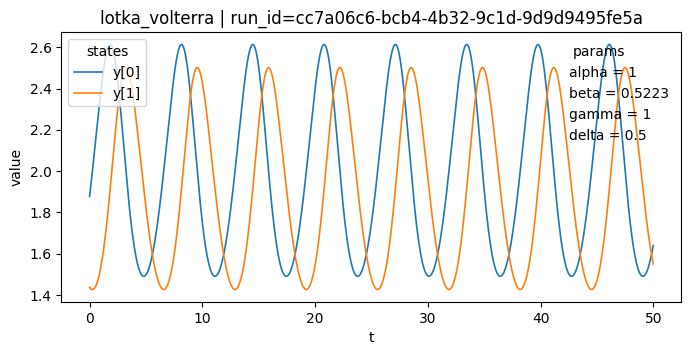

In [3]:
# Plot first 5 trajectories
for i, sample in enumerate(read_trajectories_parquet_as_dicts(data_dir)):
    if i >= 5:
        break
    print(f"\n--- Trajectory {i} ---")
    print(f"beta={sample['params']['beta']:.3f}")
    plot_sample(sample, show=True)

## 3. Analyze Parameter Effects

See how the `beta` parameter (predation rate) affects the final prey population

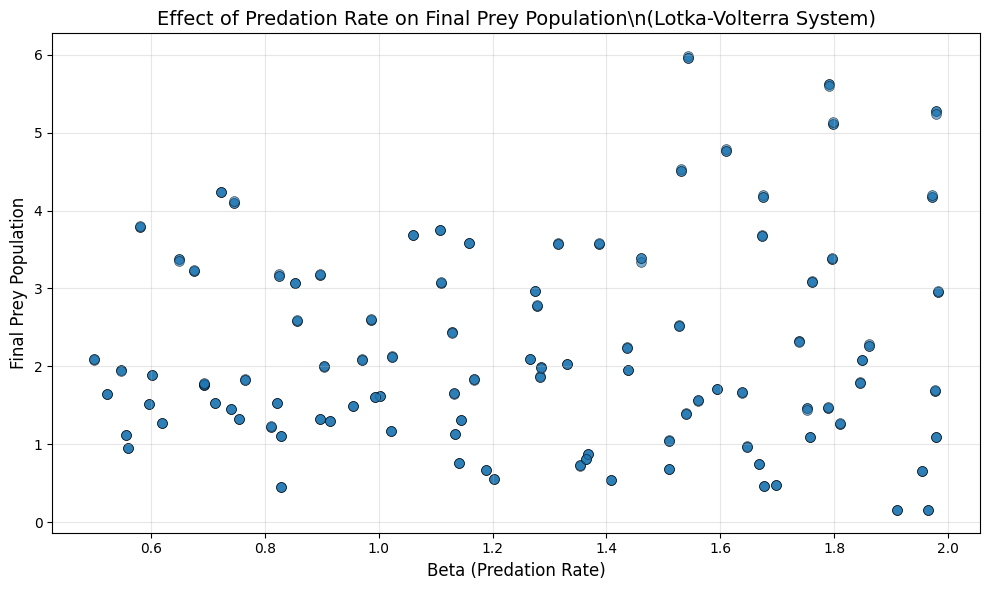

Beta range: 0.500 to 1.982
Final prey population range: 0.157 to 5.983


In [4]:
# Collect all beta values and final prey populations
betas = []
final_prey = []

for sample in read_trajectories_parquet_as_dicts(data_dir):
    betas.append(sample['params']['beta'])
    final_prey.append(sample['y'][-1, 0])  # Last time point, prey species (x)

betas = np.array(betas)
final_prey = np.array(final_prey)

# Plot parameter vs endpoint
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(betas, final_prey, s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Beta (Predation Rate)', fontsize=12)
ax.set_ylabel('Final Prey Population', fontsize=12)
ax.set_title('Effect of Predation Rate on Final Prey Population\\n(Lotka-Volterra System)', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Beta range: {betas.min():.3f} to {betas.max():.3f}")
print(f"Final prey population range: {final_prey.min():.3f} to {final_prey.max():.3f}")

## 4. Phase Space Plot (Predator vs Prey)

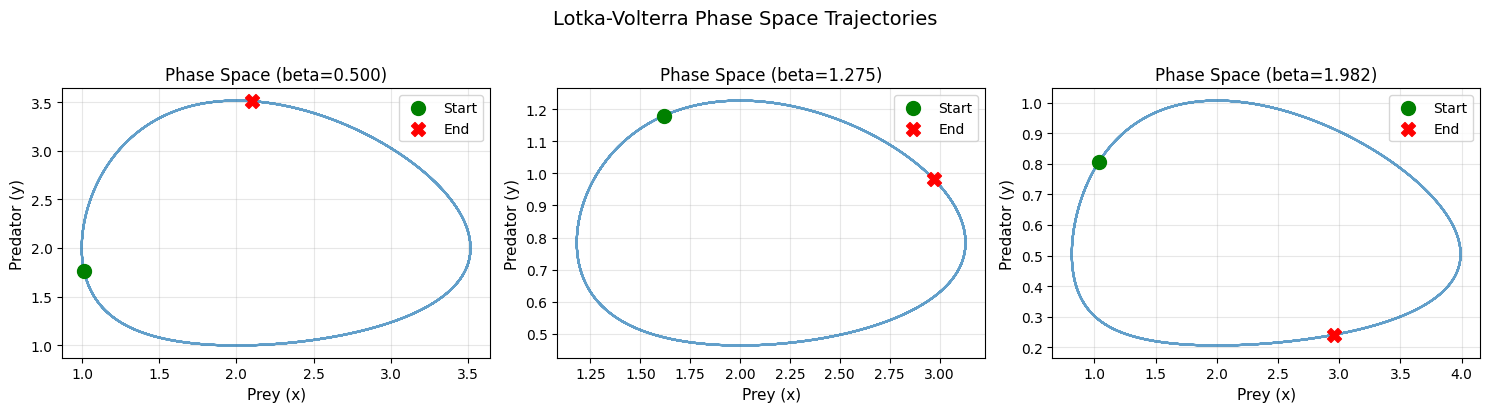

In [5]:
# Plot phase space trajectories for 3 different beta values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Get trajectories with low, medium, and high beta
beta_samples = {}
for sample in read_trajectories_parquet_as_dicts(data_dir):
    beta = sample['params']['beta']
    if beta not in beta_samples:
        beta_samples[beta] = sample

# Sort by beta and pick 3
sorted_betas = sorted(beta_samples.keys())
selected_indices = [0, len(sorted_betas)//2, -1]  # low, medium, high

for idx, ax_idx in enumerate(selected_indices):
    beta = sorted_betas[ax_idx]
    sample = beta_samples[beta]
    
    x = sample['y'][:, 0]  # Prey
    y = sample['y'][:, 1]  # Predator
    
    ax = axes[idx]
    ax.plot(x, y, linewidth=1.5, alpha=0.7)
    ax.scatter(x[0], y[0], color='green', s=100, marker='o', label='Start', zorder=5)
    ax.scatter(x[-1], y[-1], color='red', s=100, marker='X', label='End', zorder=5)
    ax.set_xlabel('Prey (x)', fontsize=11)
    ax.set_ylabel('Predator (y)', fontsize=11)
    ax.set_title(f'Phase Space (beta={beta:.3f})', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.suptitle('Lotka-Volterra Phase Space Trajectories', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 5. Statistics Summary

In [6]:
# Compute statistics across all trajectories
prey_max = []
pred_max = []
prey_min = []
pred_min = []

for sample in read_trajectories_parquet_as_dicts(data_dir):
    prey_max.append(sample['y'][:, 0].max())
    pred_max.append(sample['y'][:, 1].max())
    prey_min.append(sample['y'][:, 0].min())
    pred_min.append(sample['y'][:, 1].min())

print("=== Dataset Statistics ===")
print(f"\nPrey (x):")
print(f"  Max range: {min(prey_max):.3f} to {max(prey_max):.3f}")
print(f"  Min range: {min(prey_min):.3f} to {max(prey_min):.3f}")
print(f"\nPredator (y):")
print(f"  Max range: {min(pred_max):.3f} to {max(pred_max):.3f}")
print(f"  Min range: {min(pred_min):.3f} to {max(pred_min):.3f}")

=== Dataset Statistics ===

Prey (x):
  Max range: 2.131 to 8.134
  Min range: 0.150 to 1.875

Predator (y):
  Max range: 0.772 to 3.870
  Min range: 0.039 to 1.558


Found 5 evaluation plots

Evaluation Metrics: {'rmse': 2.3248435509832284}


--- Prediction Plot 1 ---


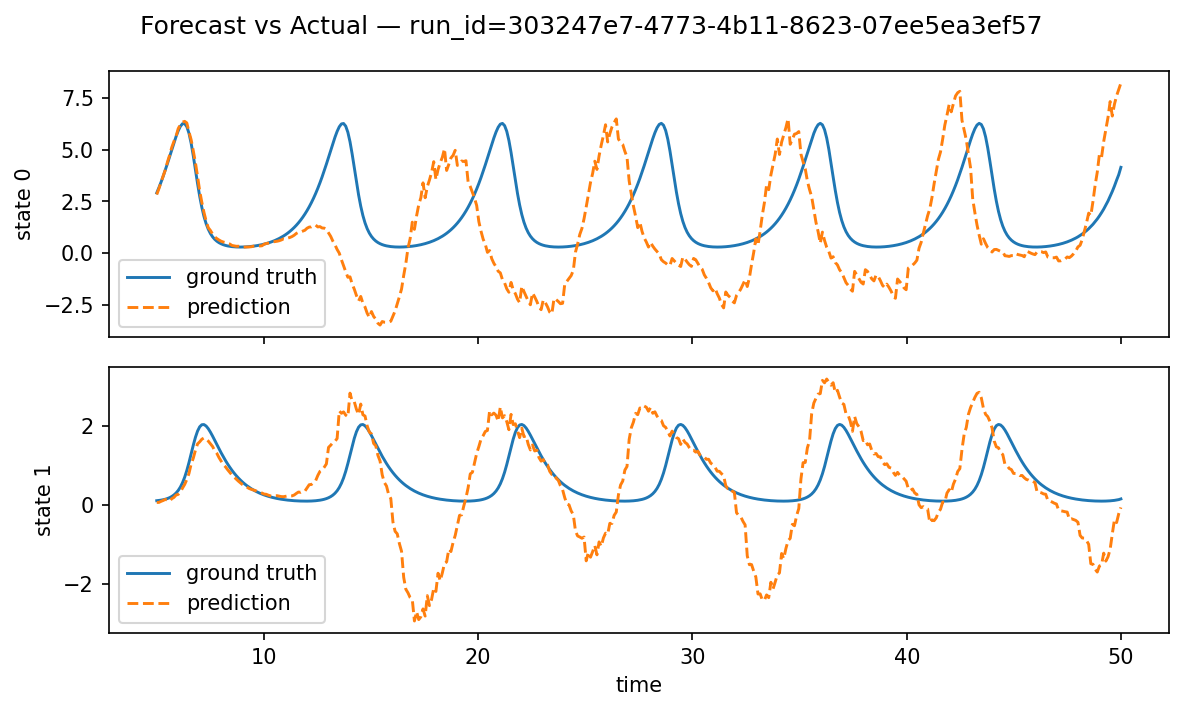


--- Prediction Plot 2 ---


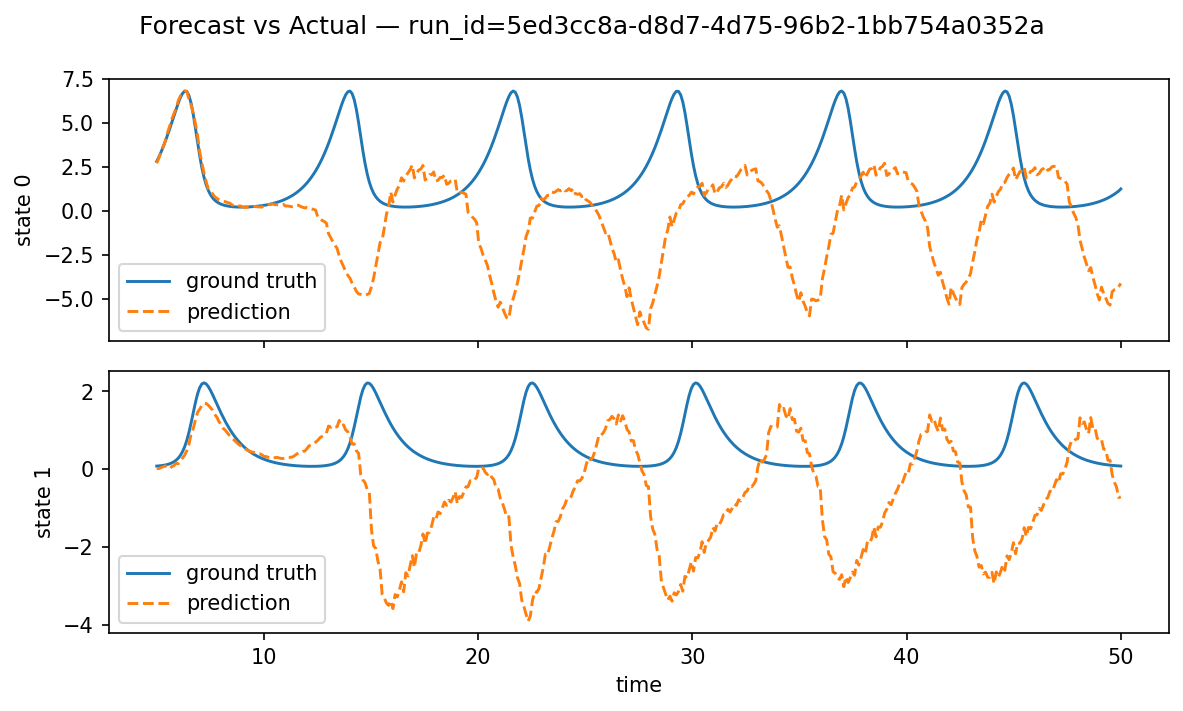


--- Prediction Plot 3 ---


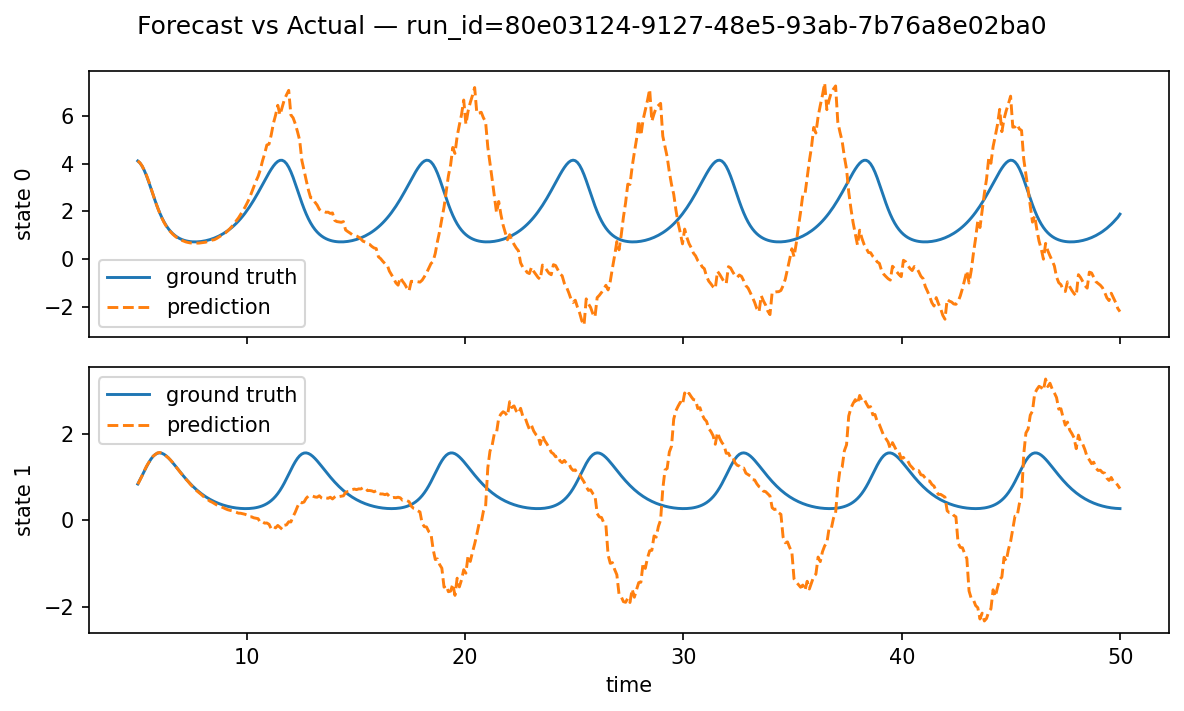


--- Prediction Plot 4 ---


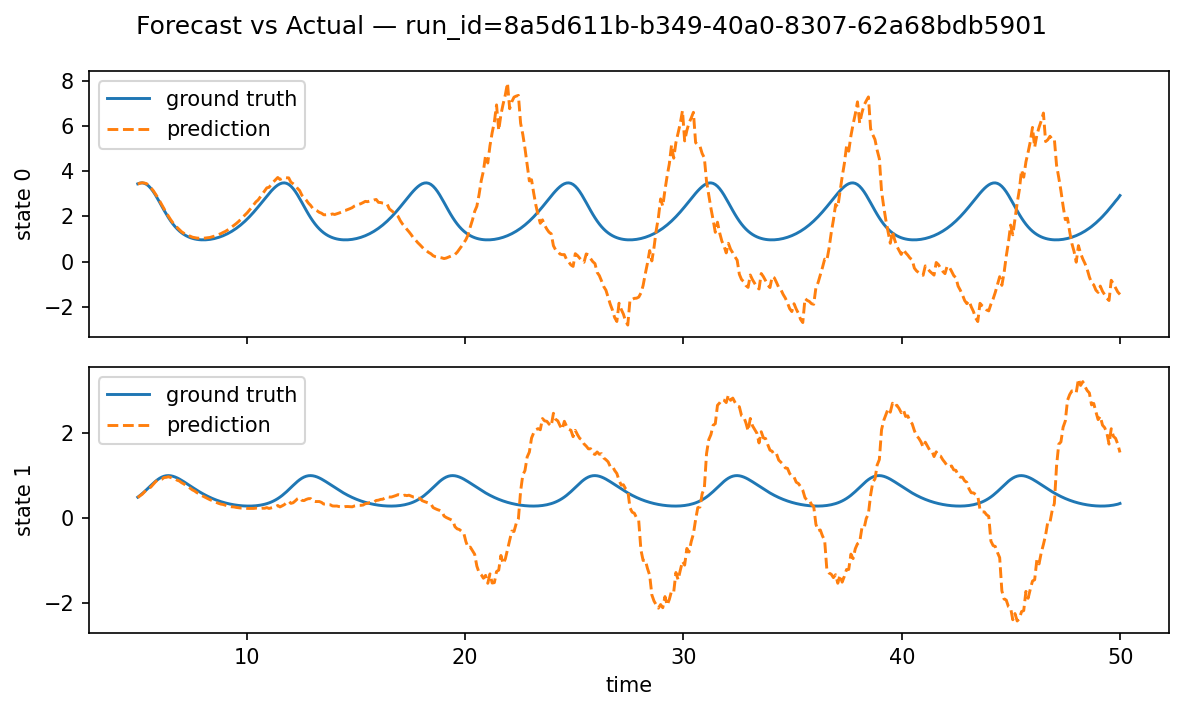


--- Prediction Plot 5 ---


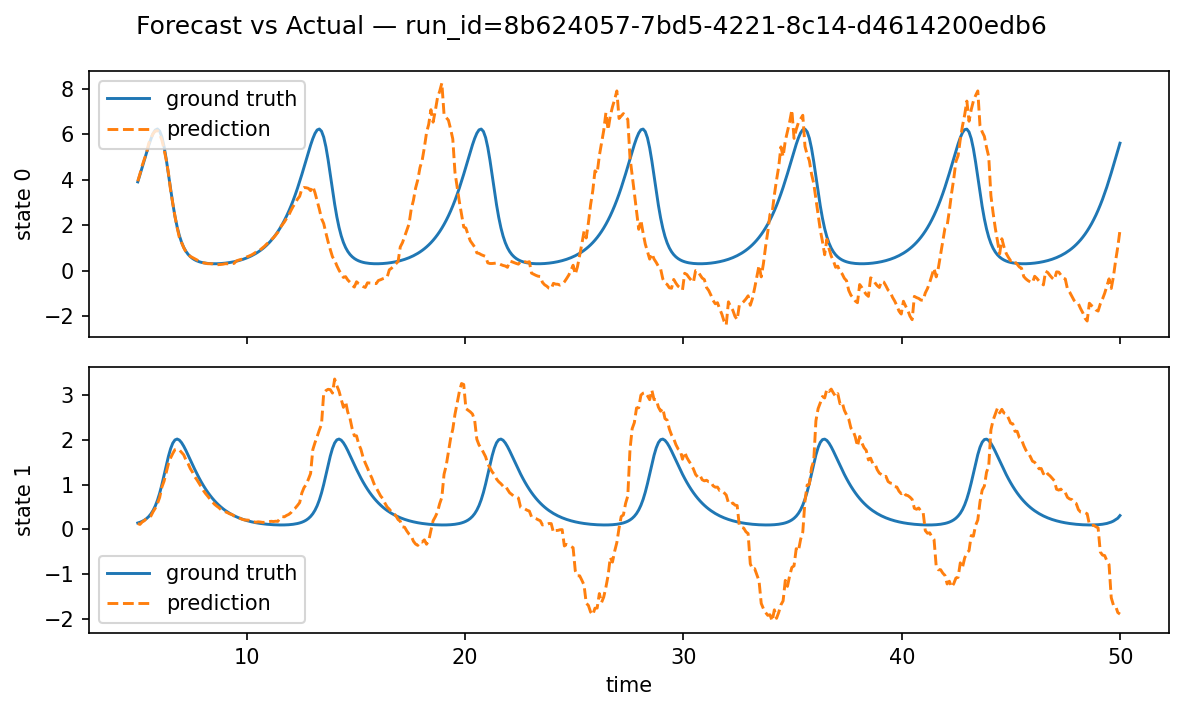

In [7]:
import matplotlib.image as mpimg
from IPython.display import Image, display
import json

# Load eval results if they exist
eval_results_dir = Path("artifacts")
eval_plots_dir = Path("plots/eval_results")

if eval_plots_dir.exists():
    eval_plots = sorted(eval_plots_dir.glob("*.png"))
    print(f"Found {len(eval_plots)} evaluation plots\n")
    
    # Also try to load metrics if available
    metrics_path = Path("artifacts/eval_results.json")
    if metrics_path.exists():
        with open(metrics_path) as f:
            metrics = json.load(f)
        print(f"Evaluation Metrics: {metrics}\n")
    
    # Display plots
    for i, plot_file in enumerate(eval_plots[:5], 1):  # Show first 5
        print(f"\n--- Prediction Plot {i} ---")
        display(Image(filename=str(plot_file)))
else:
    print("No evaluation plots found. Run 'make eval' first to generate predictions.")

## 6. Model Evaluation Results

View the MLP model's predictions vs ground truth on test trajectories